In [75]:
from sklearn.datasets import fetch_openml 

import numpy as np 
import pandas as pd 

import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

## For exercise 2 - shifting images
from scipy.ndimage.interpolation import shift

## For exercise 3 - Kaggle comp 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier




from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Build a classifier for MNSIT that achieves over 97% accuracy (KNeighborsClassifier)

Referencing Chap2. notebook for base code

In [4]:
## Actually scratch that - get the data, clean split etc... 
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # default is returned as string 

In [5]:
## Sort the target variables (done to get same dataset because fetch_ml deprecated)
## 'Rebuilding the dataset' with train and test splits 
def sort_by_target(mnist, end_train_index):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:end_train_index])]))[:,-1] # Just select index 
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[end_train_index:])]))[:,-1]
    mnist.data[:end_train_index] = mnist.data[reorder_train]
    mnist.target[:end_train_index] = mnist.target[reorder_train]
    mnist.data[end_train_index:] = mnist.data[reorder_test + end_train_index]
    mnist.target[end_train_index:] = mnist.target[reorder_test + end_train_index]

    
end_train_index = 60000
sort_by_target(mnist, end_train_index)

In [6]:
## Get the target and response variable, then make sure every fold has a healthy variaty of labels in the data 
X, y = mnist.data, mnist.target

# Get your data / target train and test sets + shuffle for every fold 
X_train, X_test, y_train, y_test = X[:end_train_index], X[end_train_index:], y[:end_train_index], y[end_train_index:]
shuffled_indices = np.random.permutation(end_train_index)
X_train, y_train = X_train[shuffled_indices], y_train[shuffled_indices]

In [7]:
## Additional data manips for KNN 
## 1. Scale the data 
## ..
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
X_train_tr = num_pipeline.fit_transform(X_train.astype(np.float64))


[0]


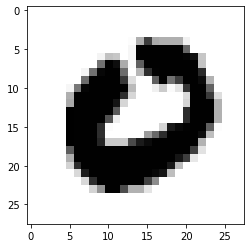

In [8]:
## Fit simple KNN model - set baseline (just with default values)
knn_clf = KNeighborsClassifier() 
# cross_val_score(knn_clf, X_train, y_train, cv = 3, scoring='accuracy')## Check accuracy with cross val - why is it so slow?? 

# Simple fit / predict for now
knn_clf.fit(X_train, y_train)
y_knn_pred = knn_clf.predict([X_test[3]])
print(y_knn_pred)
plt.imshow(X_test[3].reshape(28,28), cmap = matplotlib.cm.binary, 
          interpolation='nearest')


In [9]:
# ## Looking at parameters for KNeighborsClassifier: 
# ## -> n_neighbors, weights.. 
# ## Set parameters first, then train with GridSearch to find best params.. 
# param_grid = [{'weights':["uniform","distance"], 'n_neighbors':[3,4,5]}]
# knn_clf = KNeighborsClassifier()
# grid_search = GridSearchCV(knn_clf, param_grid, cv = 1, verbose = 3) ## Verbose controls how long message is
# grid_search.fit(X_train, y_train)

## Exercise 2

In [35]:
## 1. Write function 
## @note: Can plot accuracy vs. number of directions added 
## .. e.g. Add one random direction, two radom directions ... all directions. 

# ## Test shifting one random image, say X_train[2]

# plt.imshow(X_train[2].reshape(28,28), cmap = matplotlib.cm.binary, 
#           interpolation='nearest')
# # print(X_train[2])
# test = shift(input=X_train[2].reshape(28,28), shift=(10,0)).reshape(784,)
# print(type(test))

# # plt.imshow(test, cmap = matplotlib.cm.binary, 
# #           interpolation='nearest')

# print(X_train.shape)
# # print(type([1,2]))
# print(X_train[2].reshape(28,28).reshape(784,).shape)
# print(X_train[2].shape)

# def shift_mnist_dataframe(X_train, return_shifted_direction='all'):
#     '''
#     return_shifted_direction argument can be 'left','right','up','down' and 'all' (default)
#     For now, just return everything 
#     '''
    
## Works, but not exactly clean + returns list of dataframes... a mess basically 
# def shift_row(X_train_row):
#     new_X_rows = pd.DataFrame(X_train_row)
# #     print("Original Shape: ", new_X_rows.shape)

#     for shift_tuple in zip([-1,1,0,0],[0,0,-1,1]):
# #         print("Shifting in direction: ", shift_tuple)
# #         print("Row: ", X_train_row.shape)
# #         print("DATA:",X_train_row)
#         shifted_image = pd.Series(shift(input=X_train_row.reshape(28,28), shift=shift_tuple).reshape(784))
#         new_X_rows = pd.concat([new_X_rows, shifted_image], axis=1)
# #         print(new_X_rows.shape)
#     return new_X_rows    


# X_train_expanded = []
# for index, image in enumerate(X_train): 
# #     if (index % 100 == 0): print("Shifting image in index: ", index)
#     X_train_expanded.append(shift_row(image))
#     print(len(X_train_expanded))


    
        
        
# print(pd.DataFrame(X_train))
# shift_mnist_dataframe(pd.DataFrame(X_train))


In [44]:
def shift_image(image, dx,dy): 
    shifted_image = shift(input = image.reshape((28,28)), shift=[dx,dy], cval=0, mode='constant')
    return(shifted_image.reshape([-1]))

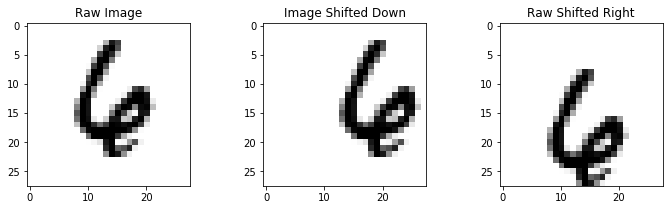

In [49]:
## Test shift_image() on train set and plot to see results.. 
image = X_train[100]
image_down = shift_image(image,0,5)
image_right = shift_image(image,5,0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Raw Image")
plt.imshow(image.reshape((28,28)), cmap=matplotlib.cm.binary, interpolation='nearest')

plt.subplot(132)
plt.title("Image Shifted Down")
plt.imshow(image_down.reshape((28,28)), cmap=matplotlib.cm.binary, interpolation='nearest')

plt.subplot(133)
plt.title("Raw Shifted Right")
plt.imshow(image_right.reshape((28,28)), cmap=matplotlib.cm.binary, interpolation='nearest');

plt.show()


In [52]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for index, (image,label) in zip(X_train,y_train): 
    for dx,dy in enumerate(zip([1,-1,0,0],[0,0,1,-1])):
        X_train_augmented.append(shift_image(image,dx,dy))
        y_train_augmented.append(label)

In [64]:
# X_train_augmented is originally an array of ndarray
X_train_augmented = np.array(X_train_augmented) 
y_train_augmented = np.array(y_train_augmented)

In [72]:
shuffle_index = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_index]
y_train_augmented = y_train_augmented[shuffle_index]

## Titanic Kaggle

In [4]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [8]:
## My take 
## Explore the data 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
## use the info() method to get a quick description fo the data 
train.info()

## Ignore Name and Tickets for now - no obvious / easy way to process them now 
## Also with most cabin values being null -> ignore 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
## Take a quick look at categorical variable coumts
## for cols such as Sex, Cabin, Embarked, Pclass... 
categorical_cols = train.columns[train.dtypes == "object"].to_list()
categorical_cols.remove('Name')

for colname in categorical_cols: 
    print("***{}***".format(colname))
    print(train[colname].value_counts())
    print("****\n")




***Sex***
male      577
female    314
Name: Sex, dtype: int64
****

***Ticket***
CA. 2343             7
347082               7
1601                 7
CA 2144              6
347088               6
3101295              6
382652               5
S.O.C. 14879         5
4133                 4
347077               4
17421                4
LINE                 4
W./C. 6608           4
2666                 4
113781               4
113760               4
PC 17757             4
19950                4
349909               4
PC 17755             3
24160                3
PC 17582             3
13502                3
110152               3
347742               3
29106                3
230080               3
35273                3
PC 17760             3
PC 17572             3
                    ..
W.E.P. 5734          1
A/5 21174            1
330959               1
S.O.P. 1166          1
347087               1
C.A. 33595           1
SOTON/O.Q. 392087    1
3460                 1
350036               1

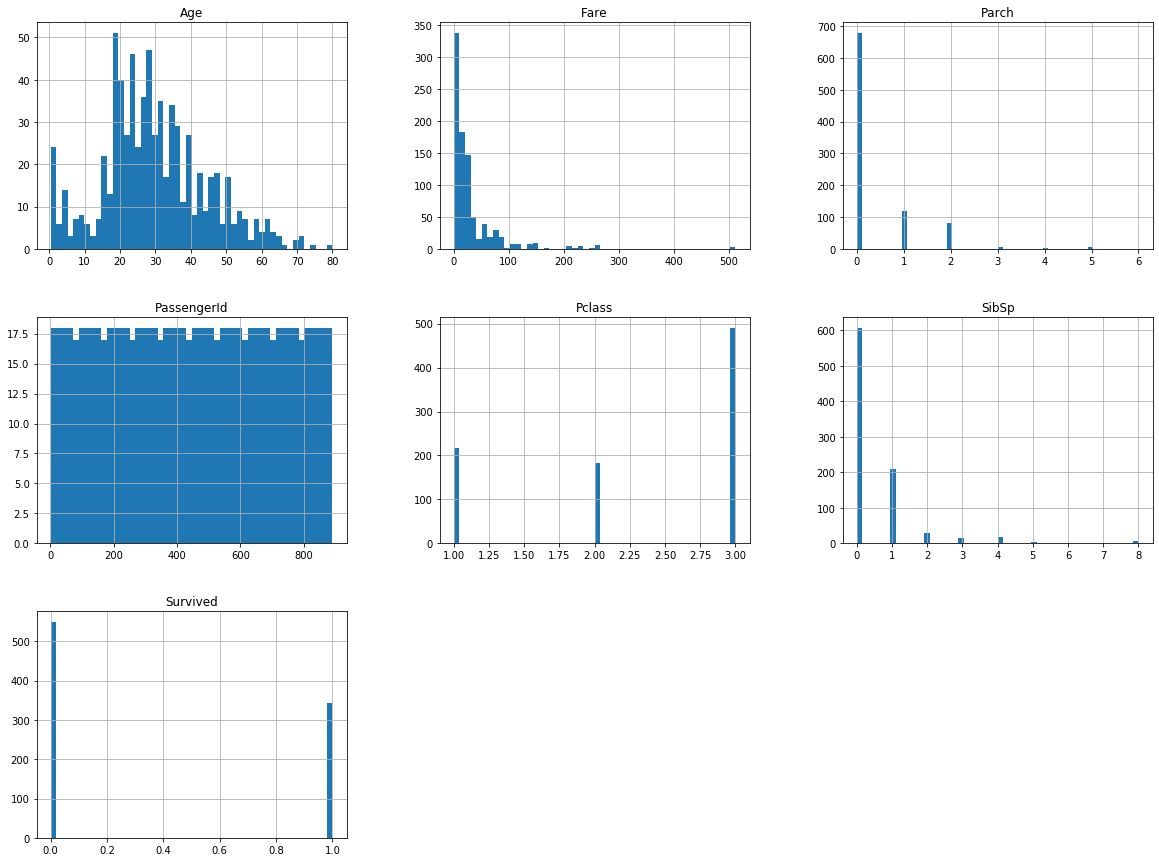

In [28]:
## Alternatively, plot distributions 
train.hist(bins=50, figsize=(20,15))
plt.show()

- Most passengers between the age of 18 and 50, losts of young children (<5) and long tail for old individuals 
- Most fares low, long tail and probably outlier for fare > 500 
- Most people traveling alone (Parch and Sibsp) 
- PClasses even between 1 and 2, double for 3rd class 

In [30]:
# Look for simple correlations 
corr_matrix = train.corr() 
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [31]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
## Again, write a custom transformer for sklearn to handle dataframes.. 
## It transforms the data by selecting the desired attributes 
## .. and dropping the rest, and converting the resulting df to 
## .. numpy array
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names): 
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self 
    def transform(self, X):
        return X[self.attribute_names]
    
num_pipe = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])), 
    ("imputer", SimpleImputer(strategy="median")) # Imputing Age 
])


num_pipe.fit_transform(train)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [57]:
## Write a transformer to get most frequent categorical labels 
## .. and impute null values with them 
## From fillna doc: input is a dict/Series/df specifying which values 
## to use for each index (for a Series) or col (for a df) 
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                        index = X.columns)
        return self 
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
        
cat_pipe = Pipeline([
    ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ("most_frequent", MostFrequentImputer()), 
    ("one_hot", OneHotEncoder(sparse=False))
])

In [66]:
cat_pipe.fit_transform(train)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [68]:
## Join the transformers 
full_pipe = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipe),
    ("cat_pipeline", cat_pipe)
])

In [73]:
X_train = full_pipe.fit_transform(train)
y_train = train['Survived']

In [76]:
## Try a RF model 
forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv = 10)
forest_scores.mean()

0.8149526160481217

In [77]:
forest_scores

array([0.74444444, 0.8       , 0.76404494, 0.82022472, 0.88764045,
       0.83146067, 0.83146067, 0.7752809 , 0.84269663, 0.85227273])

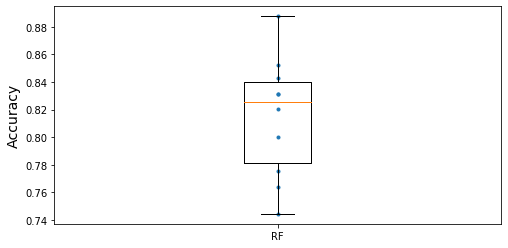

In [85]:
plt.figure(figsize=(8,4))
plt.plot([1]*10,forest_scores, ".")
plt.boxplot([forest_scores], labels=["RF"])
plt.ylabel("Accuracy", fontsize=14)
plt.show()